In [39]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style(style='darkgrid')

In [2]:
from parcing import get_vacancies

In [3]:
skill_list = ['machine AND learning', 'data AND science', 'NLP',
              'spark', 'hadoop', 'pandas', 'dask', 'deep AND learning', 'pytorch',
              'tensorflow', 'keras', 'ai AND developer', 'computer AND vision',
              'нейронные AND сети', 'big AND data']

get_vacancies(skill_list, 'data.csv')


collecting <machine AND learning> (1 of 15)
||||||||||
collecting <data AND science> (2 of 15)
||||||||||
collecting <NLP> (3 of 15)
||||||||||
collecting <spark> (4 of 15)
||||||||||
collecting <hadoop> (5 of 15)
||||||||||
collecting <pandas> (6 of 15)
||||||||||
collecting <dask> (7 of 15)
||||||||||
collecting <deep AND learning> (8 of 15)
||||||||||
collecting <pytorch> (9 of 15)
||||||||||
collecting <tensorflow> (10 of 15)
||||||||||
collecting <keras> (11 of 15)
||||||||||
collecting <ai AND developer> (12 of 15)
||||||||||
collecting <computer AND vision> (13 of 15)
||||||||||
collecting <нейронные AND сети> (14 of 15)
||||||||||
collecting <big AND data> (15 of 15)
||||||||||
skill parcing...
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [4]:
df = pd.read_csv('data.csv')
df['published_at'] = (pd.to_datetime(df['published_at'])).dt.date
df.head()

,id,name,schedule,accept_temporary,published_at,city,salary_mean,skills,experience,professional roles,employer,employer trusted,url
0,74376536,Data scientist,remote,False,2023-01-01,Москва,175000.0,"['Python', 'PyTorch', 'Machine Learning', 'Spa...",От 3 до 6 лет,Аналитик,Астор,True,https://hh.ru/vacancy/74376536
1,74419911,Senior Machine Learning Engineer,remote,True,2022-12-30,Тбилиси,325000.0,"['Machine Learning', 'Python', 'Scikit-learn',...",От 3 до 6 лет,"Программист, разработчик",ТРТ,True,https://hh.ru/vacancy/74419911
2,74290436,"Machine Learning Engineer, Разработка средств ...",fullDay,False,2022-12-27,Уфа,80000.0,"['Python', 'AutoCAD', 'C++', 'C/C++', 'MATLAB'...",От 3 до 6 лет,"Программист, разработчик",Компания КРУС-Запад,True,https://hh.ru/vacancy/74290436
3,70428858,Senior Machine Learning Engineer (NLP/Speech),fullDay,False,2022-12-19,Сочи,314000.0,"['Python', 'Git', 'Английский язык', 'Atlassia...",От 1 года до 3 лет,"Программист, разработчик",Отраслевой центр разработки и внедрения информ...,True,https://hh.ru/vacancy/70428858
4,73999078,Machine learning engineer/ разработчик машинно...,remote,False,2022-12-19,Пермь,300000.0,['machine learning'],От 3 до 6 лет,"Программист, разработчик",HR Агент,True,https://hh.ru/vacancy/73999078


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  680 non-null    int64  
 1   name                680 non-null    object 
 2   schedule            680 non-null    object 
 3   accept_temporary    680 non-null    bool   
 4   published_at        680 non-null    object 
 5   city                680 non-null    object 
 6   salary_mean         680 non-null    float64
 7   skills              680 non-null    object 
 8   experience          680 non-null    object 
 9   professional roles  680 non-null    object 
 10  employer            680 non-null    object 
 11  employer trusted    680 non-null    bool   
 12  url                 680 non-null    object 
dtypes: bool(2), float64(1), int64(1), object(9)
memory usage: 59.9+ KB


In [6]:
for feature in ['schedule', 'accept_temporary', 'experience', 'employer trusted']:
    print(feature)
    print(df[feature].value_counts())
    print('-'*10)

schedule
fullDay     379
remote      253
flexible     36
shift        12
Name: schedule, dtype: int64
----------
accept_temporary
False    643
True      37
Name: accept_temporary, dtype: int64
----------
experience
От 1 года до 3 лет    269
От 3 до 6 лет         202
Нет опыта             190
Более 6 лет            19
Name: experience, dtype: int64
----------
employer trusted
True     672
False      8
Name: employer trusted, dtype: int64
----------


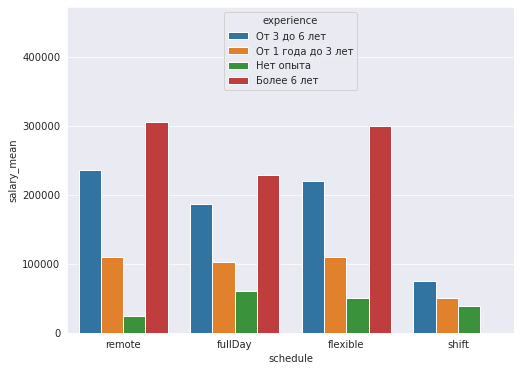

In [7]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='schedule', y='salary_mean', hue='experience', errwidth=0)
plt.show()

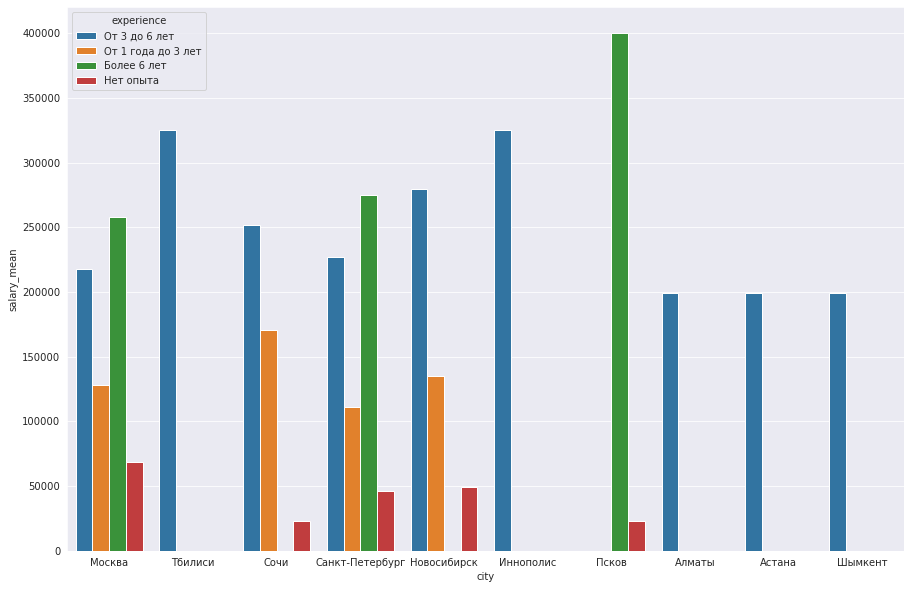

In [8]:
city_list = (df.groupby('city')[['city', 'salary_mean']]
                 .agg({'salary_mean': np.mean})
                 .nlargest(10, 'salary_mean')
                ).index
plt.figure(figsize=(15, 10))
sns.barplot(data=df[df['city'].isin(city_list)], x='city', y='salary_mean', hue='experience', errwidth=0)
plt.show()